In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [8]:
data = {
    "Area": [800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700],
    "Bedrooms": [1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    "Bathrooms": [1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
    "Age": [15, 12, 10, 8, 6, 5, 4, 3, 2, 1],
    "Distnce_City": [15, 14, 13, 12, 10, 9, 8, 7, 6,5],
    "Price": [40, 50, 55, 60, 70, 75, 80, 90, 95, 100]
}
df = pd.DataFrame(data)

In [9]:
X = df.drop("Price", axis=1)  # multiple columns
y = df["Price"]

In [26]:
X_train,X_test, y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [27]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
ridge = Ridge(alpha=2.0)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=2.0)

In [30]:
y_train_pred_lin =linear.predict(X_train_scaled)
y_test_pred_lin = linear.predict(X_test_scaled)

In [31]:
train_mse_lin = mean_squared_error(y_train, y_train_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)

print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)

Train MSE: 5.679798517591285e-29
Test MSE: 2.0194839173657902e-28


In [39]:
y_train_pred_rid =ridge.predict(X_train_scaled)
y_test_pred_rid = ridge.predict(X_test_scaled)

In [40]:
train_mse_rid = mean_squared_error(y_train, y_train_pred_rid)
test_mse_rid = mean_squared_error(y_test, y_test_pred_rid)

print("Train MSE:", train_mse_rid)
print("Test MSE:", test_mse_rid)

Train MSE: 2.72580460390538
Test MSE: 3.19803774145094


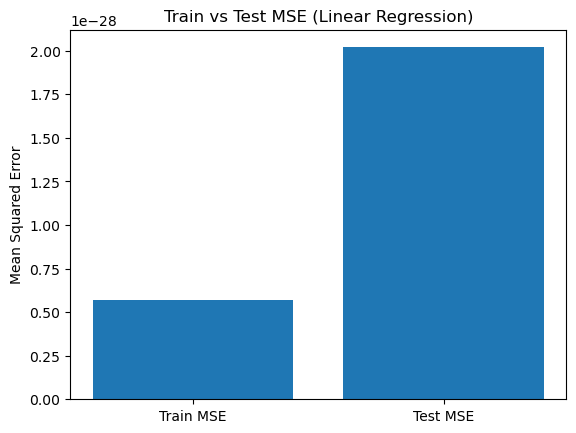

In [41]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_lin, test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Linear Regression)")
plt.show()

# lasso regularization

In [43]:
lasso = Lasso(alpha=0.5) 
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.5)

In [44]:
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

In [48]:
Train_MSE_Lasso = mean_squared_error(y_train, y_train_pred)
Test_MSE_Lasso = mean_squared_error(y_test, y_test_pred)


print("Train MSE:", Train_MSE_Lasso)
print("Test MSE:", Test_MSE_Lasso)

Train MSE: 0.2540521315349213
Test MSE: 0.35590211738900734


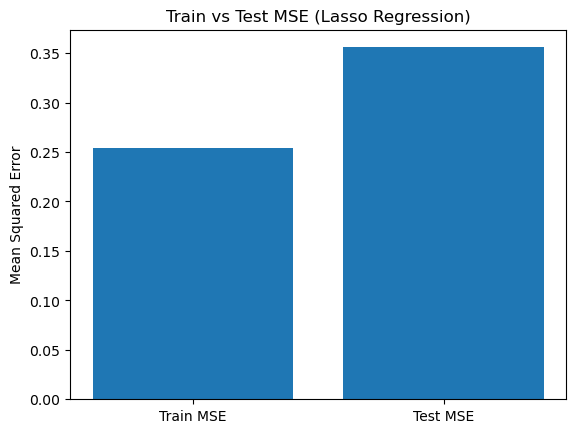

In [50]:
plt.bar(["Train MSE", "Test MSE"], [Train_MSE_Lasso, Test_MSE_Lasso])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Lasso Regression)")
plt.show()

In [56]:
lasso_coefficients = pd.Series(lasso.coef_,index=X.columns)

print(lasso_coefficients)

Area            13.200626
Bedrooms         4.581169
Bathrooms        0.000000
Age             -0.000000
Distnce_City    -0.013020
dtype: float64


In [58]:
X_plot = pd.DataFrame({
    "Area" : np.linspace(df["Area"].min(), df["Area"].max(), 100),
    "Bedrooms": df["Bedrooms"].mean(),
    "Bathrooms": df["Bathrooms"].mean(),
    "Age": df["Age"].mean(),
    "Distnce_City": df["Distnce_City"].mean()
})

<function matplotlib.pyplot.show(close=None, block=None)>

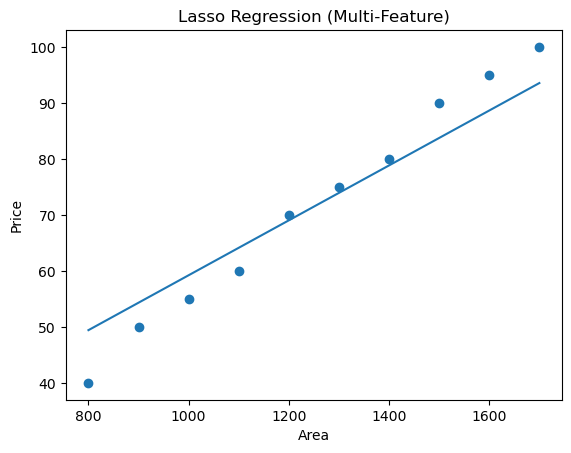

In [59]:
X_plot_scaled = scaler.transform(X_plot)
y_line = lasso.predict(X_plot_scaled)

plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(X_plot["Area"], y_line, label="Lasso Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-Feature)")
plt.show